In [1]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# acquire data

Basic acquire data, we are not modifying anything. We just wan to see the data .

In [2]:
# use function to acquire data
df1= wrangle.acquire_data()

In [3]:
#check  info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


In [4]:
df1.shape

(6435, 10)

**Takeaways**
- we have 10 columns and 6435 columns
- no nulls
- we nned to change some columns type

# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

<AxesSubplot:xlabel='Type', ylabel='Size'>

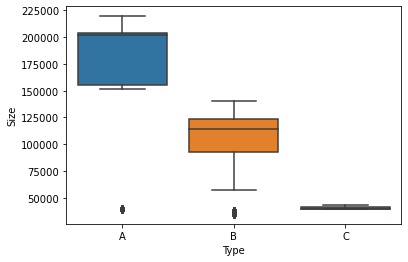

In [5]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

(0.0, 46000.0)

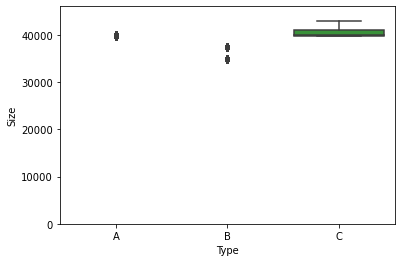

In [6]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those to  store type C

In [7]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [8]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
33,143,143,143,143,143,143,143,143,143
36,143,143,143,143,143,143,143,143,143


In [9]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
3,143,143,143,143,143,143,143,143,143
5,143,143,143,143,143,143,143,143,143


**Takeaways**
- Instead of removing theses outliers, we decided to change them to the type based on the size.
- I gave the store_id to Natasha so she is going to change the type in the wrangle function.


# Wrangle

the wrangle_walmar function is renaming columns, adding new columns, dummi variables, and set date as index (datetime type)

In [10]:
#using the funcion wrangle
df= new_wrangle.wrangle_walmart()

In [11]:
#chec the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [12]:
df.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,pre_christmas,super_bowl,tax_season,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.9,0,42,2.57,211.096,8.106,A,151315,February,...,Winter,no_holiday,NaN,NaN,0,0,0,0,0,0


<AxesSubplot:xlabel='store_type', ylabel='store_size'>

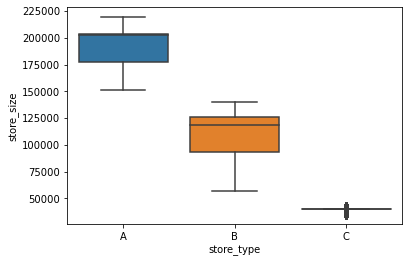

In [13]:
#checking if the store_type has no outliers
sns.boxplot(x= df['store_type'], y= df['store_size'])

In [14]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col],color ='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Number of Weeks ')
            plt.xticks(rotation=45)
            plt.ticklabel_format(style = 'plain')
            
            plt.show()

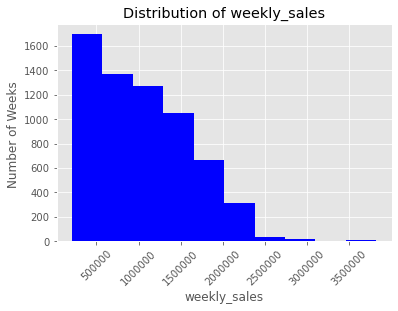

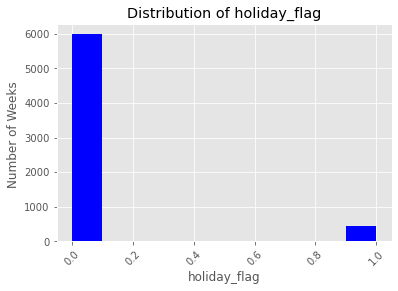

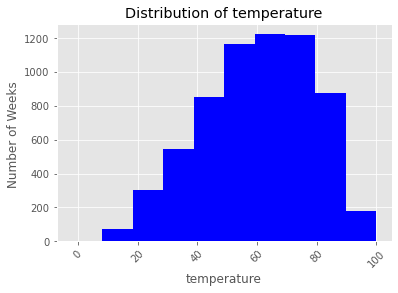

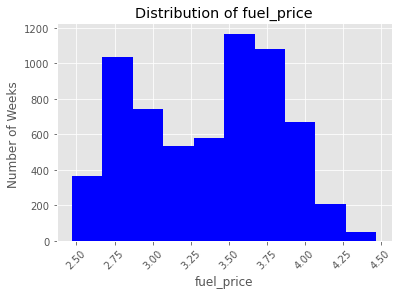

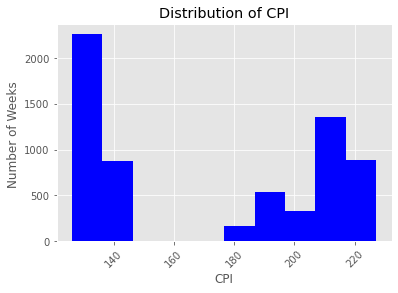

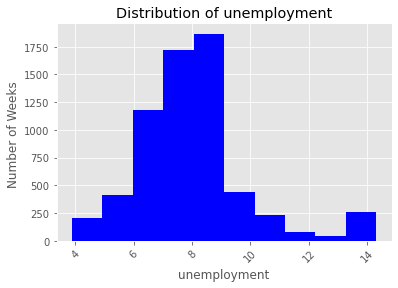

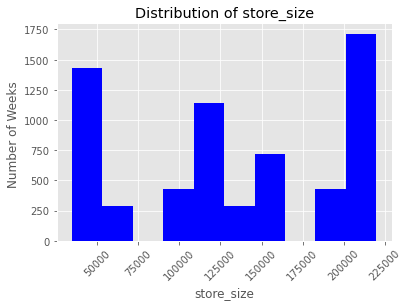

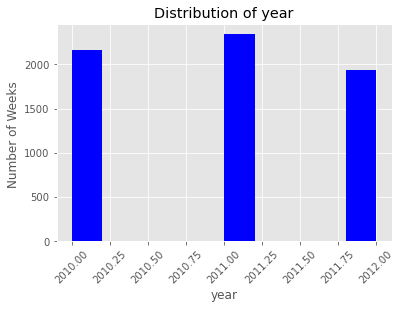

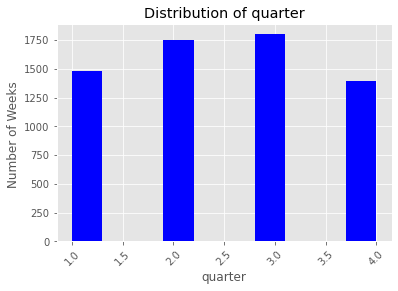

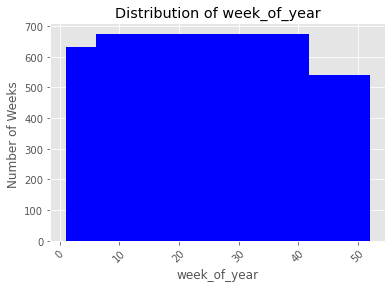

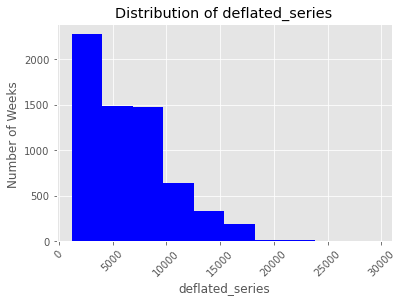

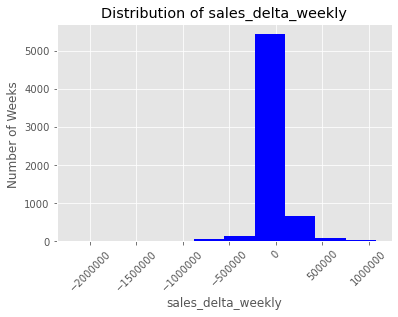

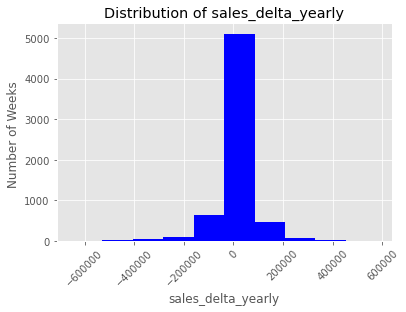

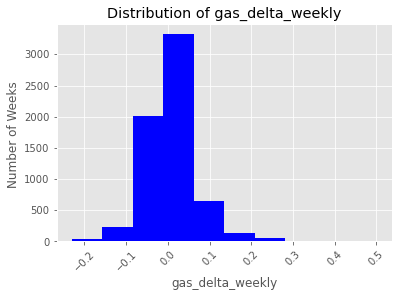

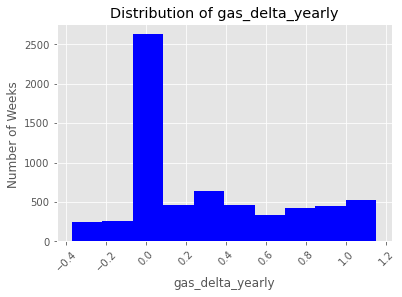

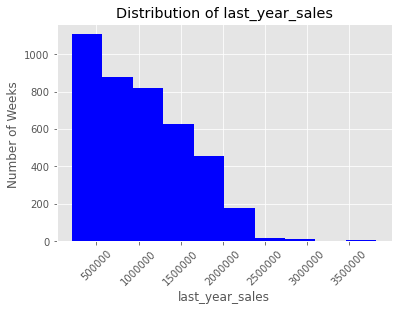

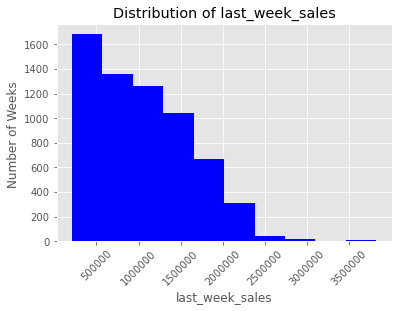

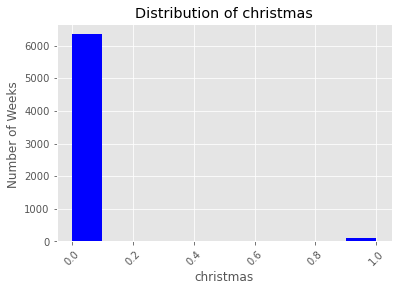

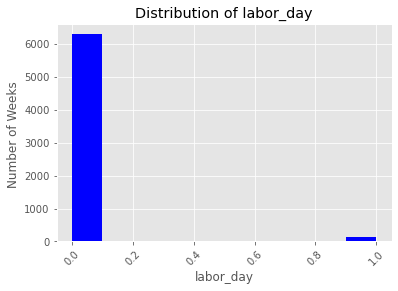

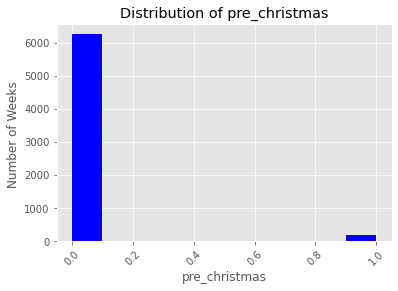

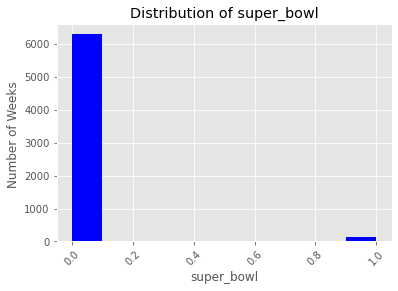

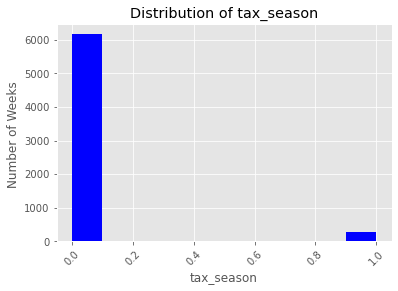

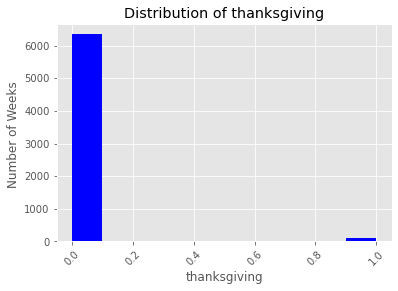

In [15]:
distribution(df)

In [16]:
df.groupby('store_type').mean()

,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_size,year,quarter,week_of_year,...,gas_delta_weekly,gas_delta_yearly,last_year_sales,last_week_sales,christmas,labor_day,pre_christmas,super_bowl,tax_season,thanksgiving
store_type,,,,,,,,,,,,,,,,,,,,,
A,1.482672e+06,0.06993,59.239161,3.340094,174.757753,7.765653,190992.5,2010.965035,2.482517,25.818182,...,0.007297,0.292073,1.463906e+06,1.483042e+06,0.013986,0.020979,0.027972,0.020979,0.041958,0.013986
B,8.846799e+05,0.06993,55.589744,3.399310,161.490490,8.075424,109865.0,2010.965035,2.482517,25.818182,...,0.007837,0.300490,8.769598e+05,8.848837e+05,0.013986,0.020979,0.027972,0.020979,0.041958,0.013986
C,4.189779e+05,0.06993,68.887413,3.334636,180.351532,8.351736,39511.7,2010.965035,2.482517,25.818182,...,0.007524,0.290769,4.148206e+05,4.190368e+05,0.013986,0.020979,0.027972,0.020979,0.041958,0.013986


Store type:  A


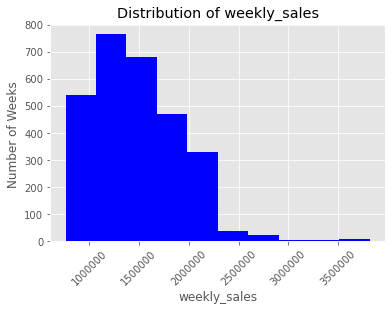

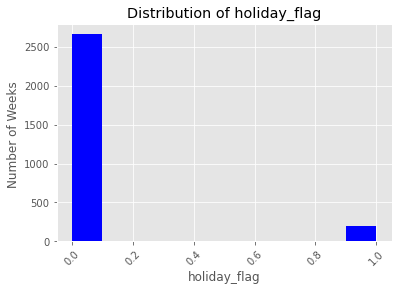

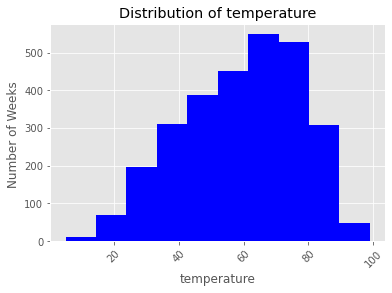

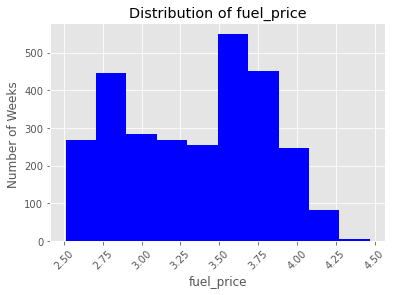

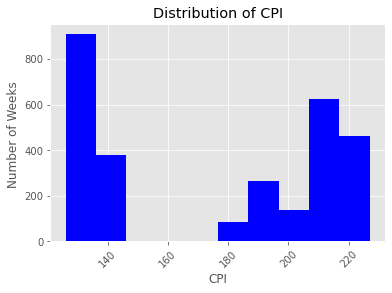

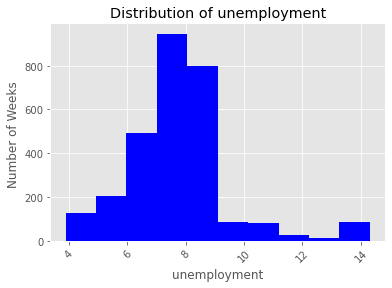

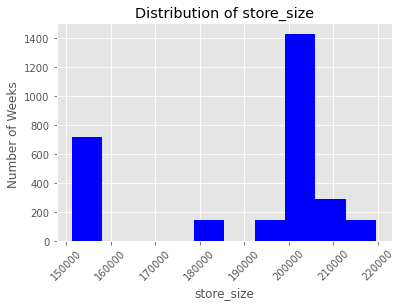

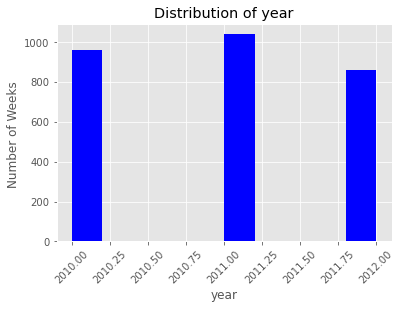

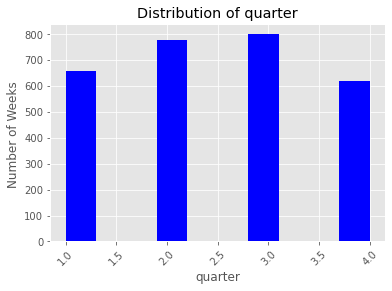

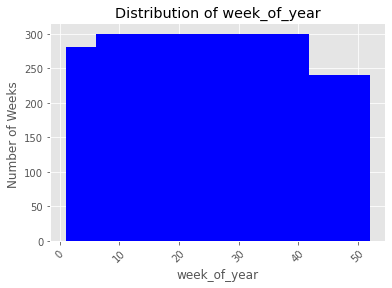

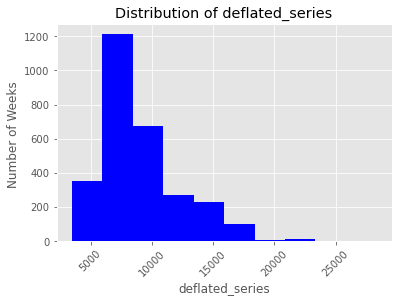

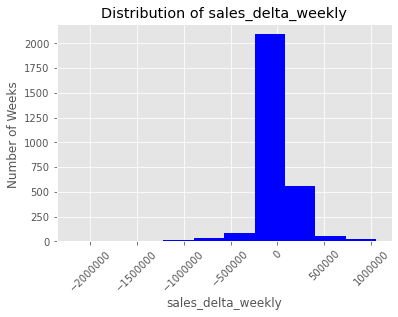

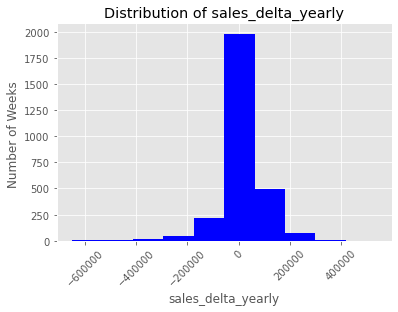

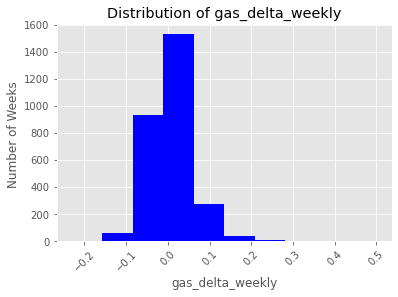

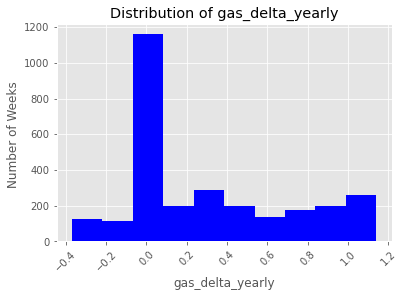

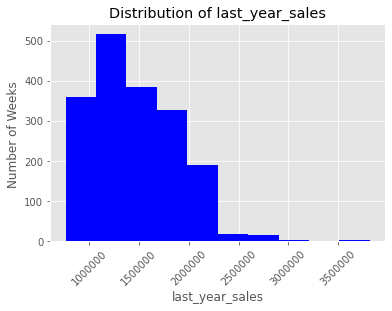

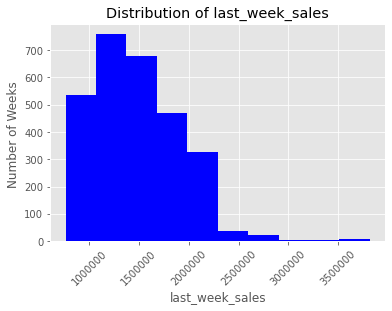

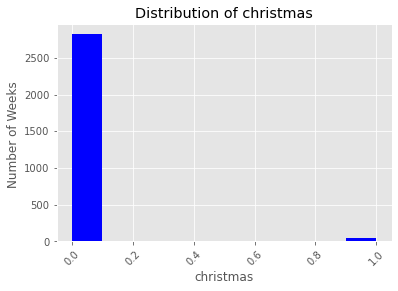

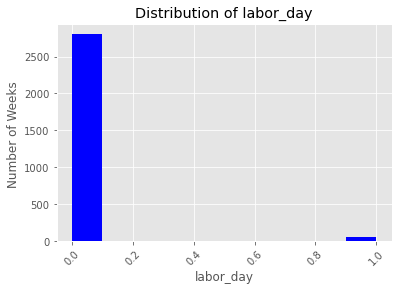

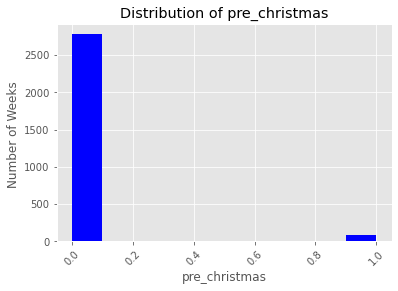

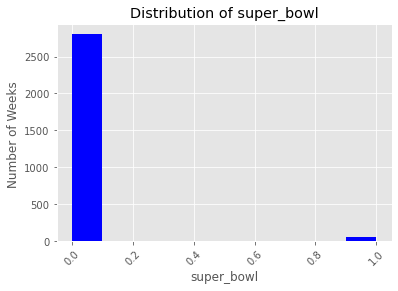

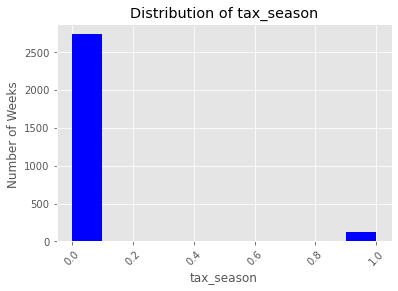

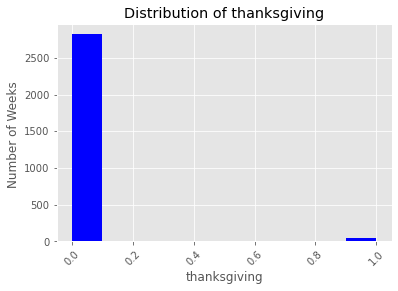

Store type:  B


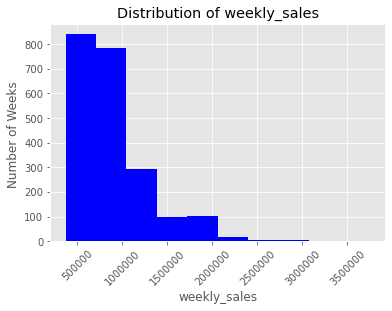

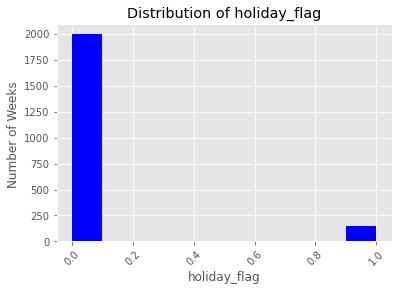

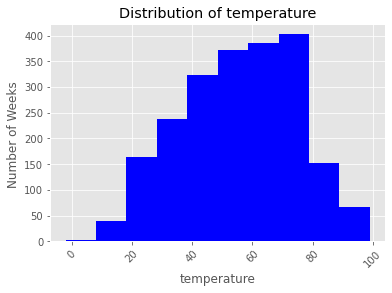

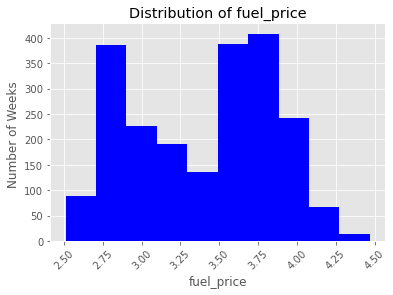

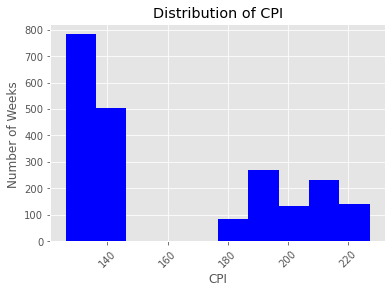

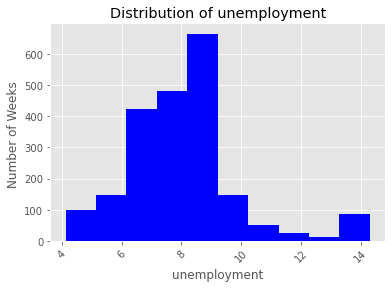

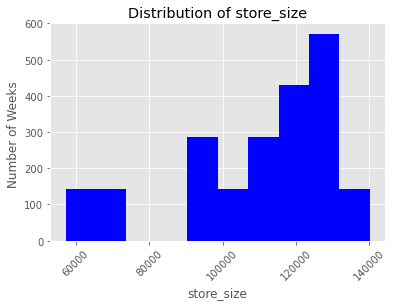

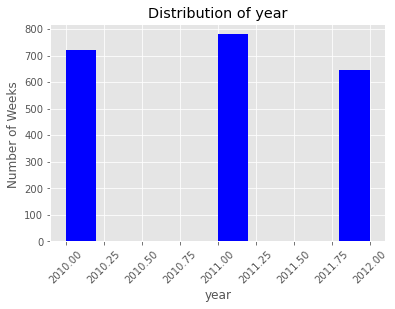

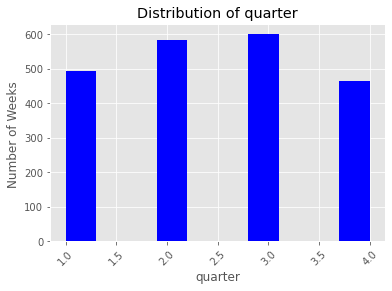

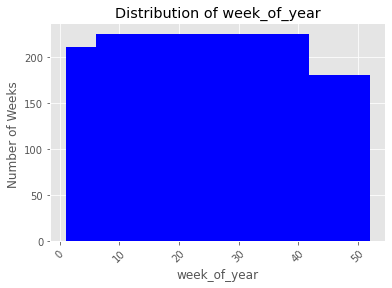

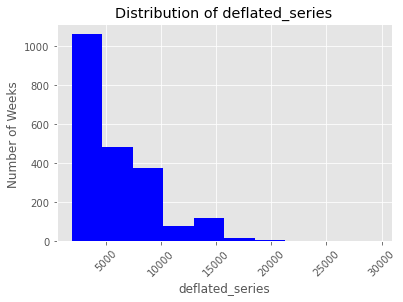

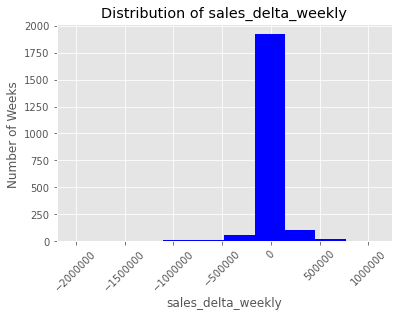

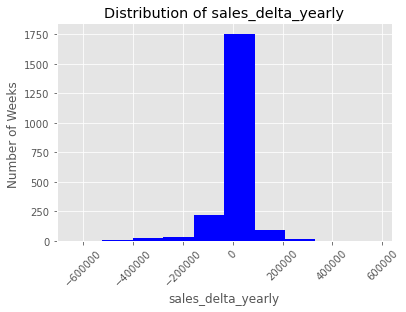

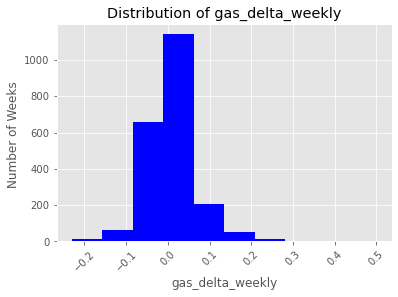

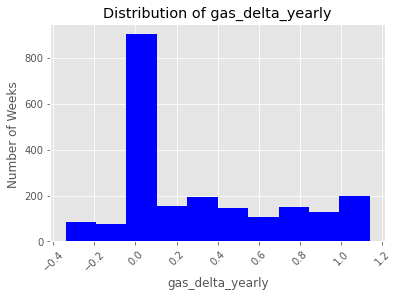

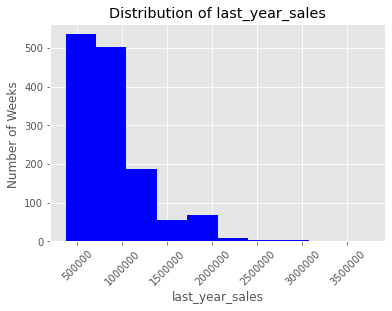

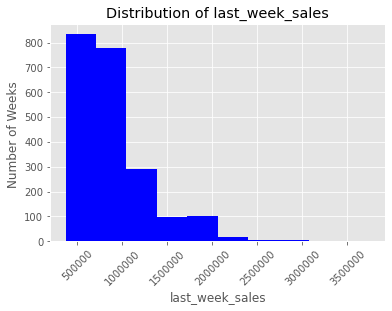

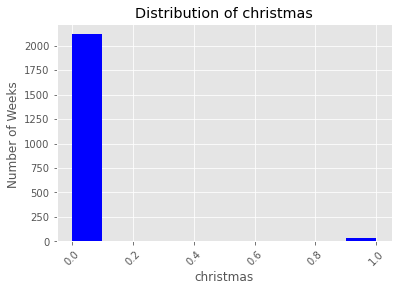

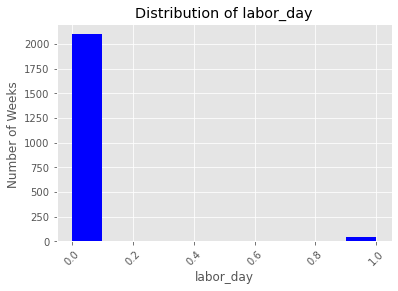

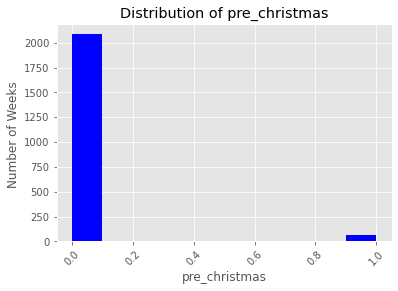

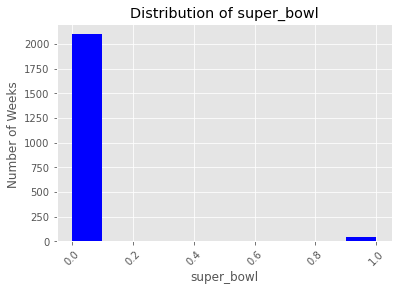

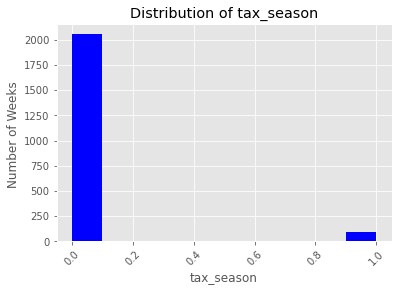

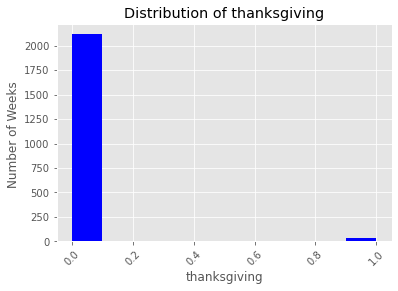

Store type:  C


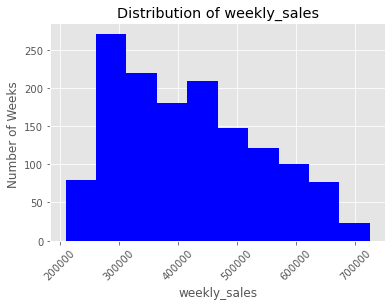

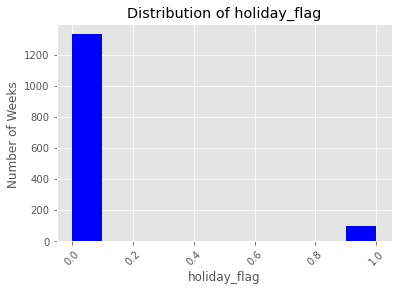

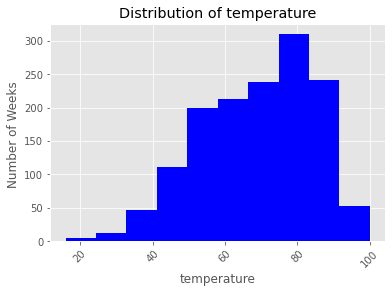

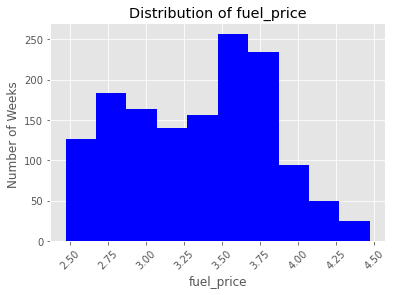

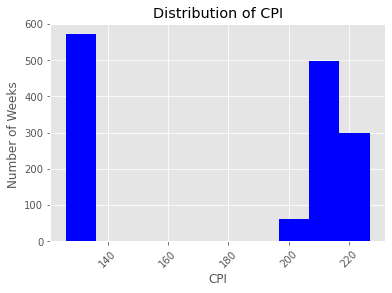

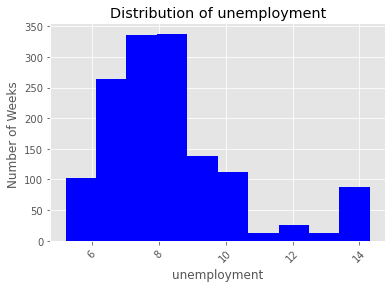

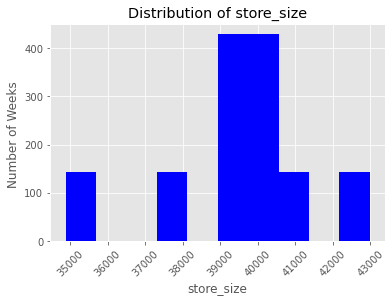

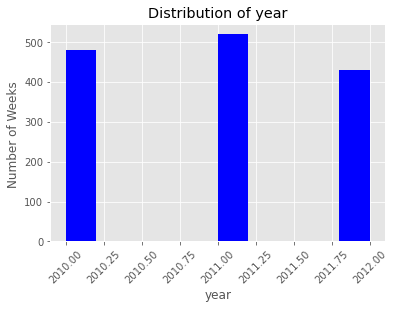

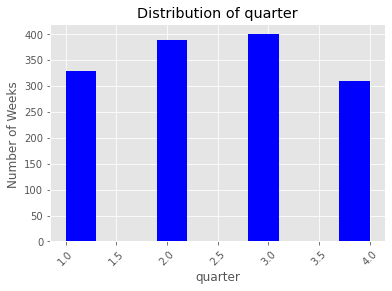

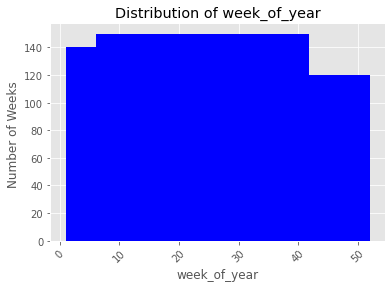

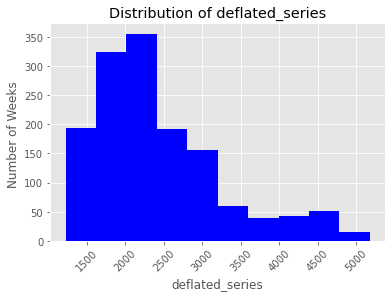

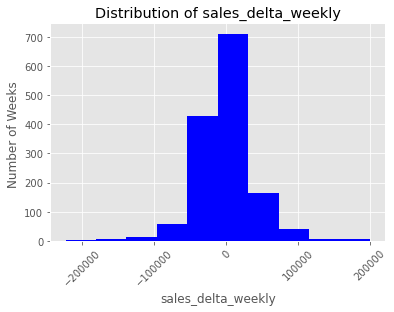

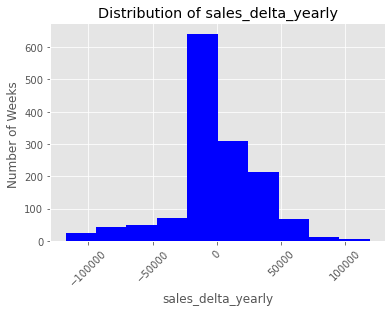

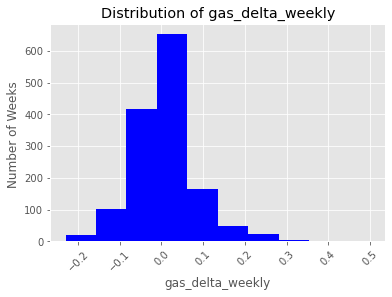

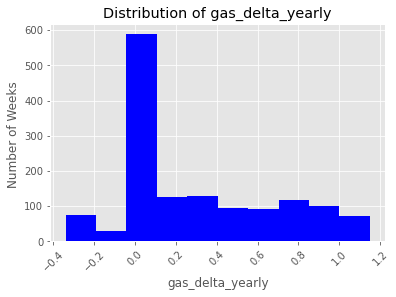

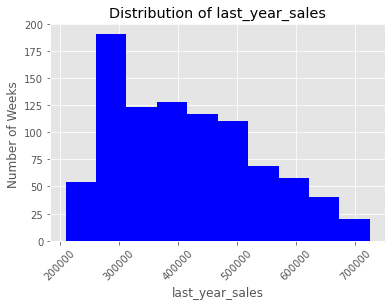

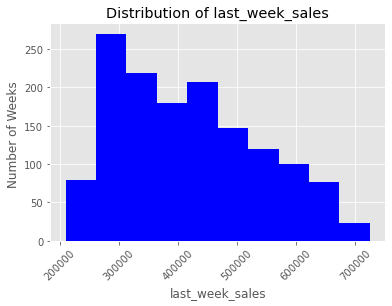

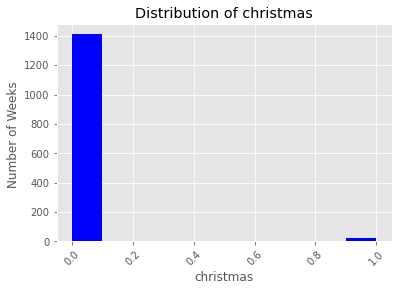

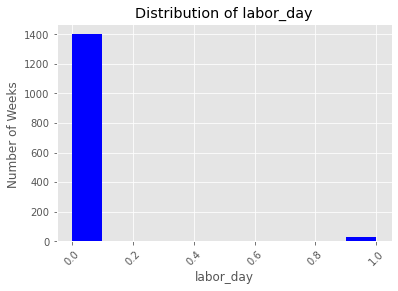

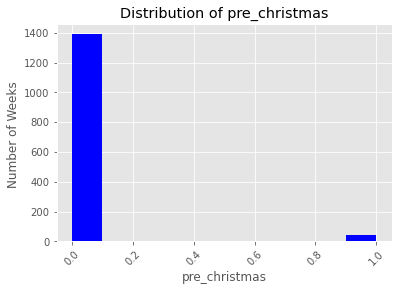

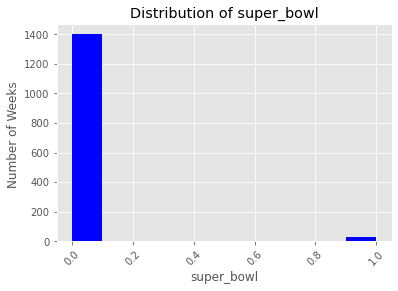

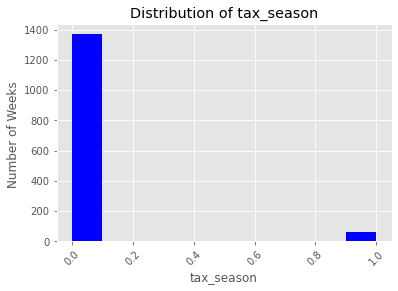

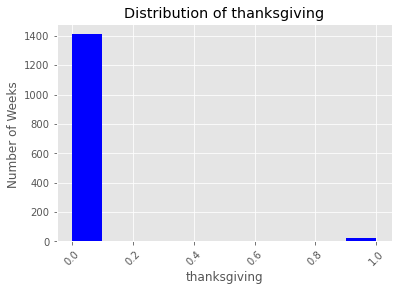

In [17]:
#let see distribution by store type
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [18]:
#how many stores are Type C
len(df[df.store_type == 'C'].store_id.value_counts())

10

In [19]:
# storeid for type c
df[df.store_type == 'C'].store_size.value_counts()

39910    429
39690    429
42988    143
37392    143
41062    143
34875    143
Name: store_size, dtype: int64

In [20]:
#store if for type B
df[df.store_type == 'B'].store_size.value_counts().sort_index()

57197     143
70713     143
93188     143
93638     143
103681    143
112238    143
114533    143
118221    143
119557    143
120653    143
123737    143
125833    143
126512    143
128107    143
140167    143
Name: store_size, dtype: int64

In [21]:
#how many stores are Type B
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

15

In [22]:
#store_Id for type A
df[df.store_type == 'A'].store_size.value_counts().sort_index()

151315    143
152513    143
155078    143
155083    143
158114    143
184109    143
196321    143
200898    143
202307    143
202505    143
203007    143
203742    143
203750    143
203819    286
204184    143
205863    143
206302    143
207499    143
219622    143
Name: store_size, dtype: int64

In [23]:
##how many stores are Type A
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

20

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [25]:
df.shape

(6435, 29)

**Takeaways**
- after wrangle_walmar we ended with 29 columns, and 6435 observations

______________________________________

## the following steps were done to complete the wrangle function

# dummies 

we are going to create dummies for :
- Holiday_name


In [26]:
#create dummy variables for 5 columns
def create_multiple_dummies (df, dumm_col = ['holiday_name', 'season', 'store_type', 'month', 'year']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dimmies)
    '''
    #the column year is an integer we need to conver as string
    df['year']= df['year'].astype('string')
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday', 'year'])
    return df

In [27]:
def create_dummies (df, dumm_col = ['holiday_name']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dummies)
    '''
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday'])
    return df

In [28]:
df['holiday_name'].value_counts()

no_holiday       5535
tax_season        270
pre_christmas     180
labor_day         135
super_bowl        135
thanksgiving       90
christmas          90
Name: holiday_name, dtype: int64

In [29]:
#test the function before I add it to .py file
df2 = create_dummies(df)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [31]:
df2.columns

Index(['store_id', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'CPI', 'unemployment', 'store_type', 'store_size', 'month', 'year',
       'quarter', 'weekday', 'week_of_year', 'deflated_series',
       'sales_delta_weekly', 'sales_delta_yearly', 'gas_delta_weekly',
       'gas_delta_yearly', 'season', 'holiday_name', 'last_year_sales',
       'last_week_sales', 'christmas', 'labor_day', 'pre_christmas',
       'super_bowl', 'tax_season', 'thanksgiving', 'christmas', 'labor_day',
       'pre_christmas', 'super_bowl', 'tax_season', 'thanksgiving'],
      dtype='object')

# Create new columns

#we need to create new columns  pre- christmas  and tax_season because on exploration(Alberto and Heather ) they found a peak in those dates. 

In [32]:
#checking the previous weeks for christmas

In [33]:
df2.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,pre_christmas,super_bowl,tax_season,thanksgiving,christmas,labor_day,pre_christmas,super_bowl,tax_season,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.9,0,42,2.57,211.096,8.106,A,151315,February,...,0,0,0,0,0,0,0,0,0,0


create a new column for is pre_christmas

-Christmas:

    - 31-Dec-10,  (pre_christmas = 24-Dec-10, 17-Dec 10)
    - 30-Dec-11, (pre_christmas = 23-Dec-11, 16-Dec 11)

In [34]:
# create new colum and add zeros to everything
df2 ['pre_christmas'] = 0

In [35]:
df2.columns

Index(['store_id', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'CPI', 'unemployment', 'store_type', 'store_size', 'month', 'year',
       'quarter', 'weekday', 'week_of_year', 'deflated_series',
       'sales_delta_weekly', 'sales_delta_yearly', 'gas_delta_weekly',
       'gas_delta_yearly', 'season', 'holiday_name', 'last_year_sales',
       'last_week_sales', 'christmas', 'labor_day', 'pre_christmas',
       'super_bowl', 'tax_season', 'thanksgiving', 'christmas', 'labor_day',
       'pre_christmas', 'super_bowl', 'tax_season', 'thanksgiving'],
      dtype='object')

In [36]:
#getting the list for pre_christmas
pre_c= ['2010-12-24', '2010-12-17', '2011-12-23', '2011-12-16']

In [37]:
#add value 1 for only pre_christmas weeks
#df2.loc[pre_c, 'pre_christmas'] = 1

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
#CHECK THE VALUES
#df2['pre_christmas'].value_counts()

#### ADD TAX SEASON

###  first 2 weeks of April
- 2010-04-02 & 2010-04-09
- 2011-04-01 & 2011-04-08
- 2012-04-06 & 2012-04-13

In [ ]:
#crete a new column and assign 0 as value
df2['tax_season'] = 0 

In [ ]:
#getting the list for tax
tax= ['2010-04-02 ', '2010-04-09', '2011-04-01', '2011-04-08', '2012-04-06', '2012-04-13']

In [ ]:
#add value 1 for only for the list above
df2.loc[tax, 'tax_season'] = 1

In [ ]:
#CHECK THE VALUES
df2['tax_season'].value_counts()

# Scale

In [ ]:
df2.head(1)

**note :** before scaling we need to split our data


In [ ]:
#select only the numeric columns 
num_df = df2.select_dtypes(exclude='object')

In [ ]:
num_df.shape

In [ ]:
num_df.head()

In [ ]:
#split using a function
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(num_df, 'weekly_sales')

In [ ]:
# imports to scale
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def scaled_df ( train_df , test_df, columns,  scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_test, columns , RobustScaler())
    
    '''
    #import
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

#     #add the columns that are not scaled
#     train_scaled_df = pd.concat([train_scaled_df, train_df.drop(columns = columns) ], axis= 1 )
#     test_scaled_df = pd.concat([test_scaled_df, test_df.drop(columns = columns) ], axis= 1 )
    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df,  test_scaled_df

In [ ]:
columns =  X_train.columns.to_list()

In [ ]:
#test the function
#train_Xscaled_df,  test_Xscaled_df= scaled_df( X_train , X_test, columns , MinMaxScaler())

In [ ]:
def train_test(df, target):
    '''
    This function brings in the dataframe and the target feature
    then returns X_train, y_train, X_test and y_test with their respective shapes
    '''
    train = df[:'05-2012'] # includes everything until june 2016
    test = df['06-2012':"2012"] #includes last 6 months

    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]

    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_test -> {X_test.shape}')

    return train, X_train, y_train, X_test, y_test

In [ ]:
def split_scale and scale (df, target, scaler):
    '''
    takes in a df and creates dummy variables, select only the numeric columns and  split into X_train, y_train, 
    X_test, y_test and scaled X_train, X_test.
    return   X_train_scaled, y_train_scaled, X_test, y_test
    '''



    #split
    train, X_train, y_train, X_test, y_test = train_test(num_df, target)

    #select the columns to scale
    columns =  X_train.select_dtypes(exclude='object').columns.to_list()
    #scale 
    X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, columns , scaler)

    return train, X_train_scaled, X_test_scaled, y_train, y_test
        
        
        
        
    

In [ ]:
#split
train, test, X_train, y_train, X_test, y_test = new_wrangle.train_test(df, 'weekly_sales')

In [ ]:
#select the columns to scale
col =  X_train.select_dtypes(exclude='object').columns.to_list()

In [ ]:
col

In [ ]:
#scale 
X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, col , MinMaxScaler())

In [ ]:
X_train_scaled.info()

In [ ]:
train, X_train_scaled, y_train_scaled, X_test, y_test = prepare_modeling_dummies (df, 'weekly_sales', MinMaxScaler())

In [ ]:
train.shape

In [ ]:
X_train_scaled.shape

# split 

In [ ]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'weekly_sales', MinMaxScaler())

In [ ]:
X_train_scaled.info()

____________________

# Wrangle and split

let's test the functions wrangle and split and scale

In [38]:
df =new_wrangle.wrangle_walmart()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

**Note:**  we have nulls in our df because we created a new column last_year_sales that's why the fisrt year has nulls because we dond have information about the previous year

In [40]:
df.shape

(6435, 29)

In [41]:
df.holiday_name.value_counts()

no_holiday       5535
tax_season        270
pre_christmas     180
labor_day         135
super_bowl        135
thanksgiving       90
christmas          90
Name: holiday_name, dtype: int64

In [42]:
#drop nulls
df2= df.dropna()

In [43]:
df2.shape

(4095, 29)

train -> (2866, 29)
test -> (1229, 29)


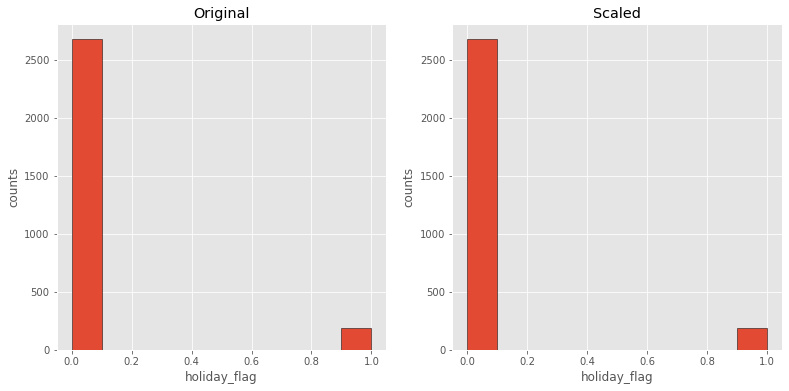

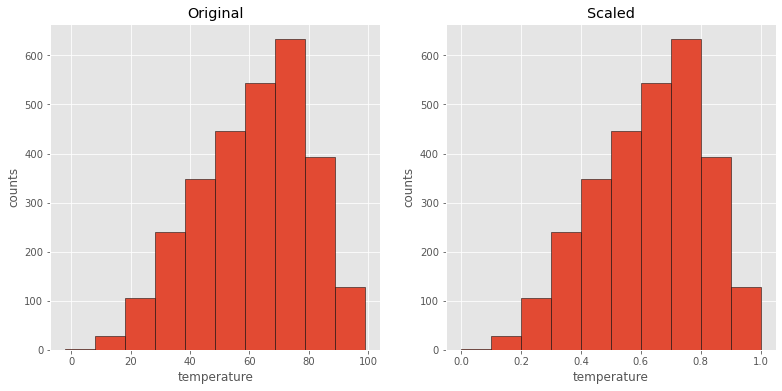

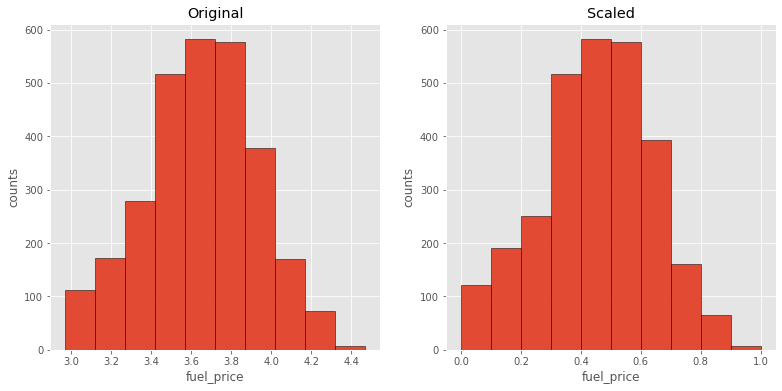

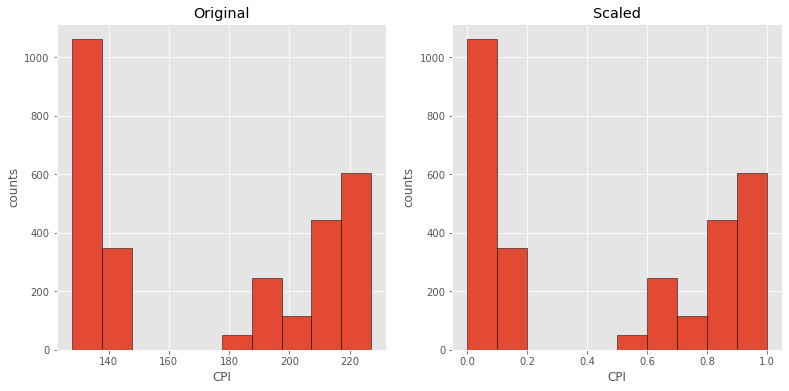

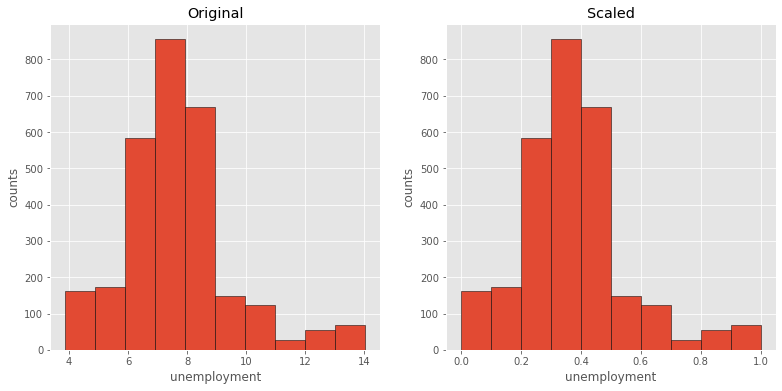

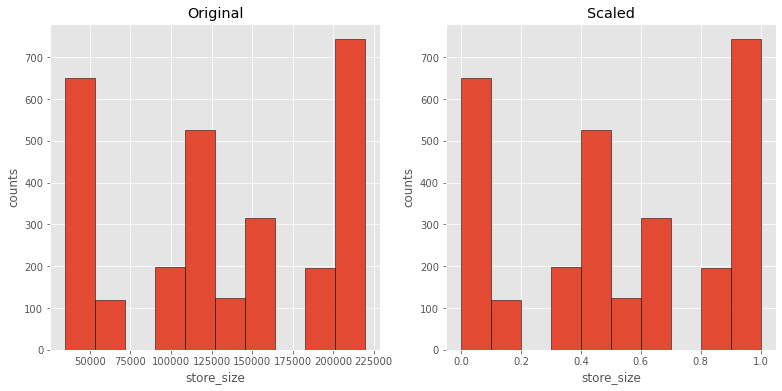

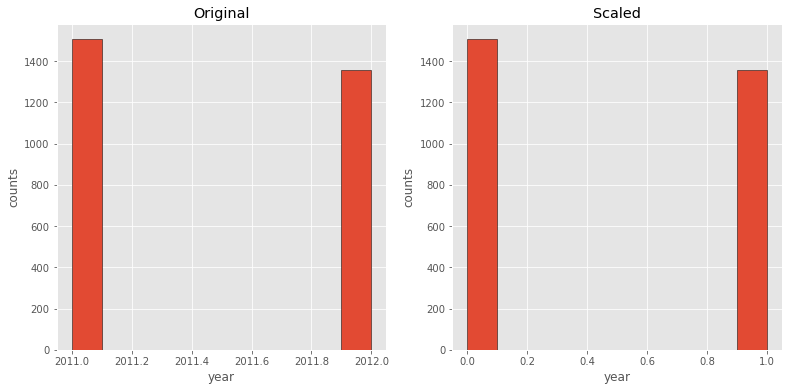

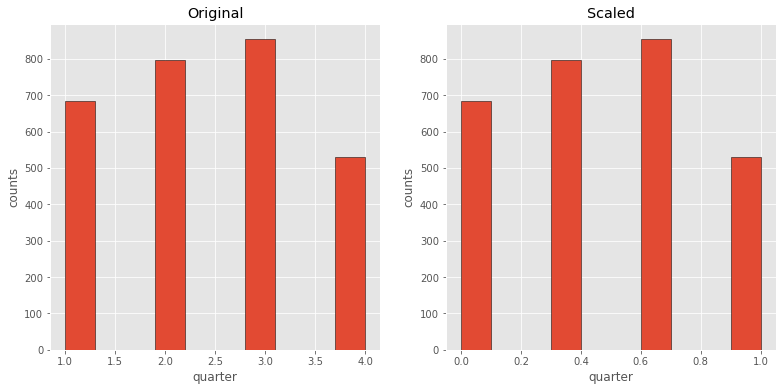

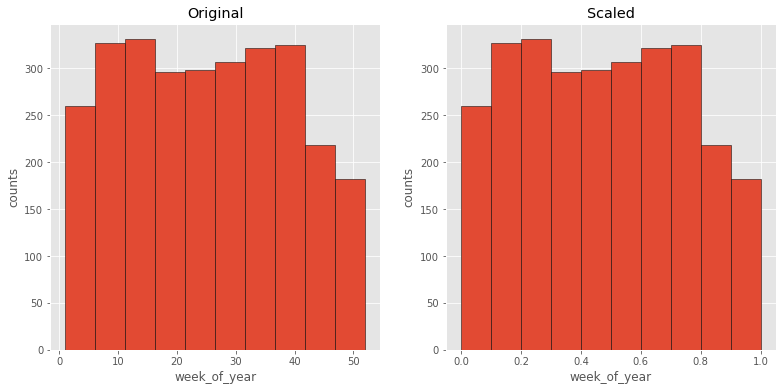

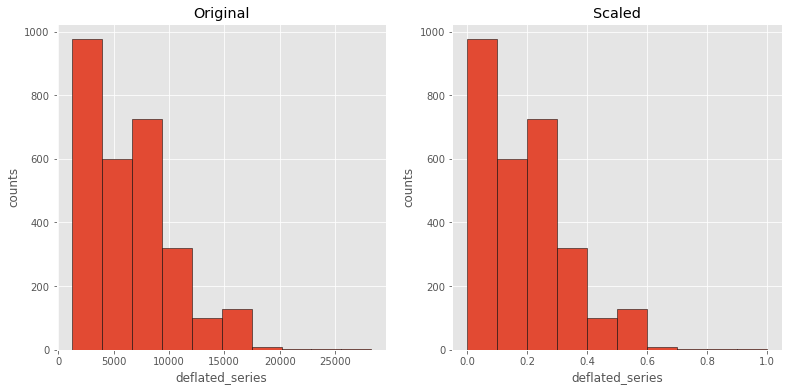

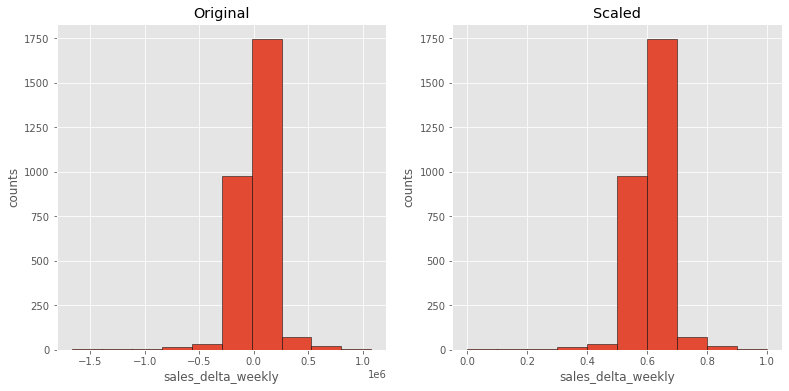

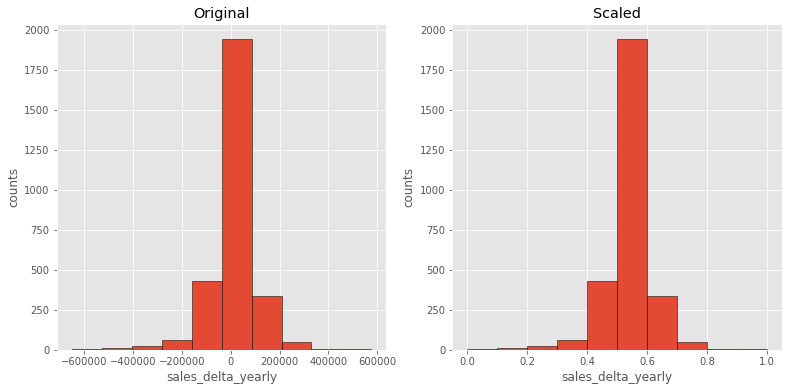

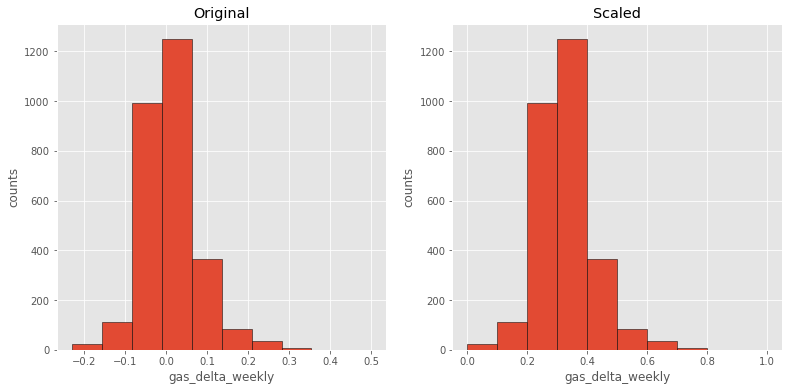

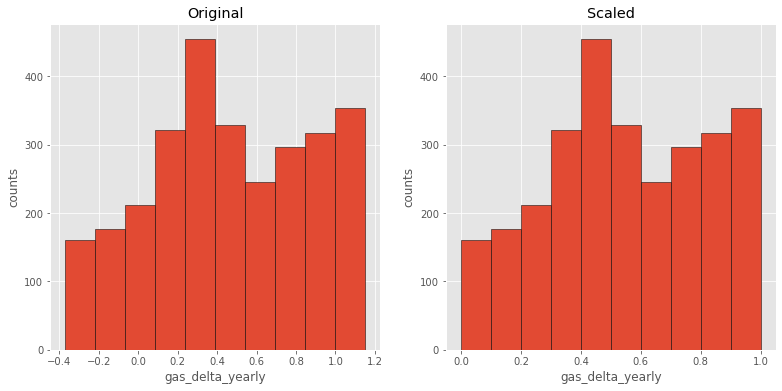

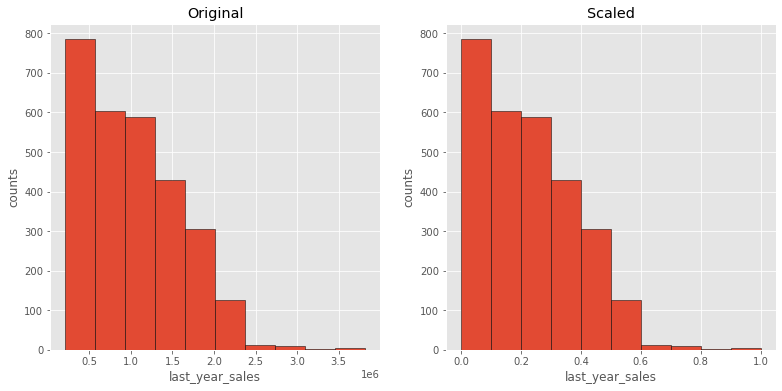

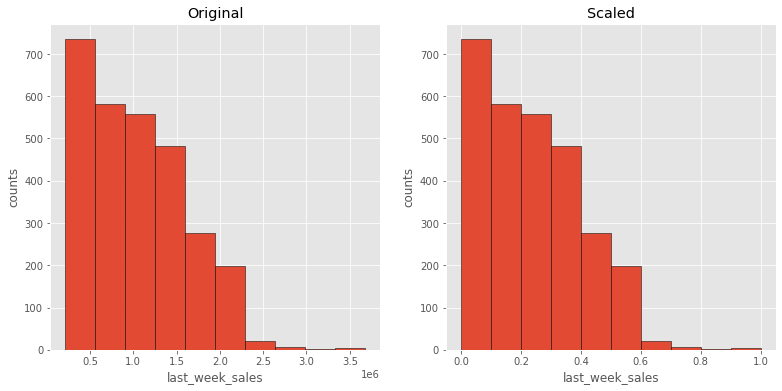

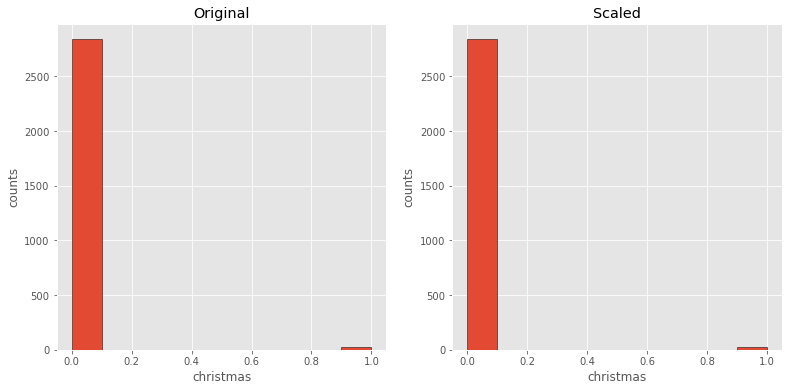

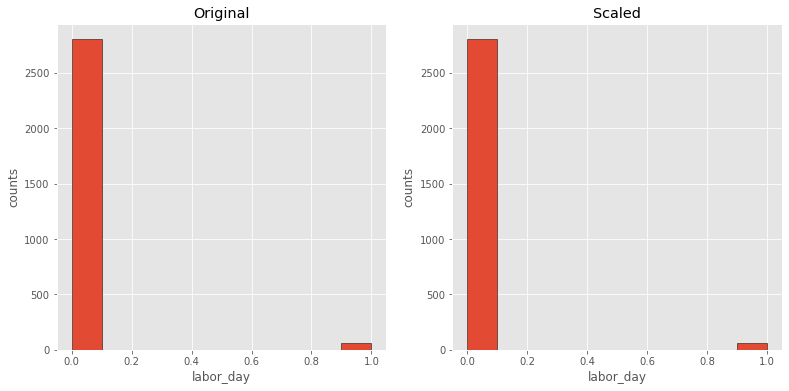

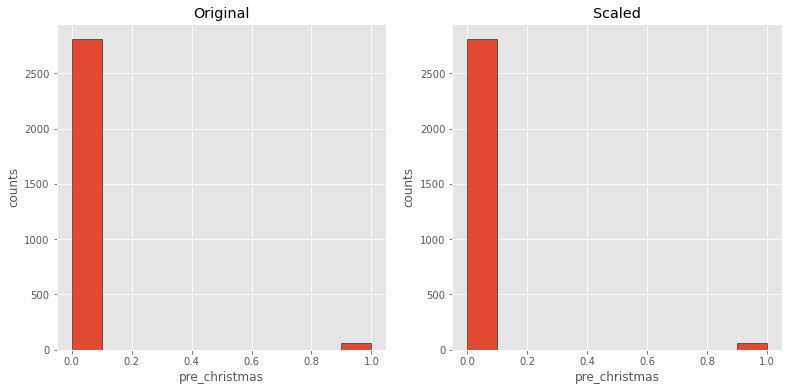

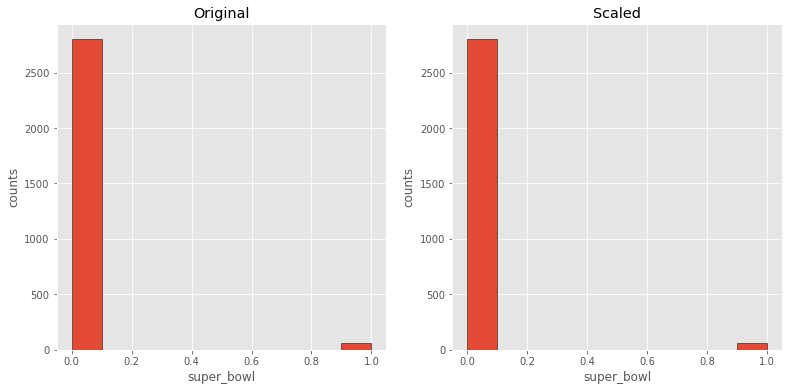

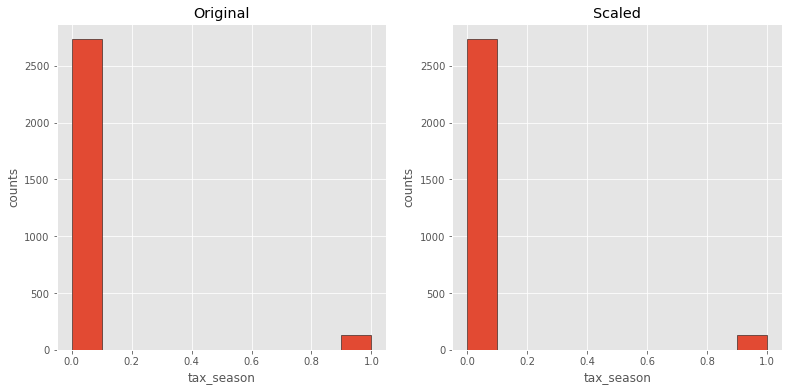

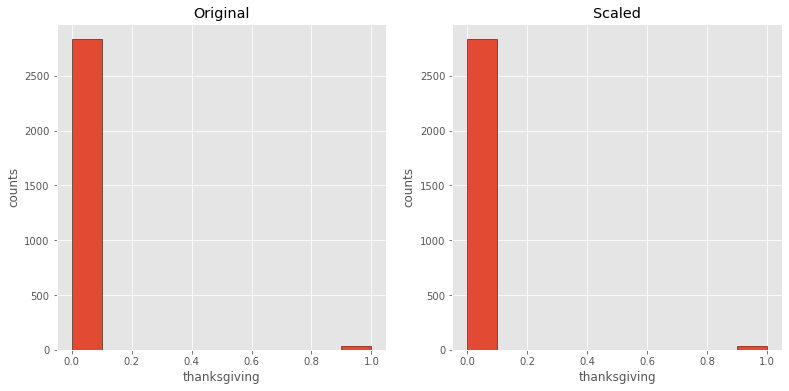

In [44]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df2, 'weekly_sales', MinMaxScaler())

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            2866 non-null   object 
 1   weekly_sales        2866 non-null   float64
 2   holiday_flag        2866 non-null   int64  
 3   temperature         2866 non-null   int64  
 4   fuel_price          2866 non-null   float64
 5   CPI                 2866 non-null   float64
 6   unemployment        2866 non-null   float64
 7   store_type          2866 non-null   object 
 8   store_size          2866 non-null   int64  
 9   month               2866 non-null   object 
 10  year                2866 non-null   int64  
 11  quarter             2866 non-null   int64  
 12  weekday             2866 non-null   object 
 13  week_of_year        2866 non-null   int64  
 14  deflated_series     2866 non-null   float64
 15  sales_delta_weekly  2866 non-null   f

In [46]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday_flag        2866 non-null   float64
 1   temperature         2866 non-null   float64
 2   fuel_price          2866 non-null   float64
 3   CPI                 2866 non-null   float64
 4   unemployment        2866 non-null   float64
 5   store_size          2866 non-null   float64
 6   year                2866 non-null   float64
 7   quarter             2866 non-null   float64
 8   week_of_year        2866 non-null   float64
 9   deflated_series     2866 non-null   float64
 10  sales_delta_weekly  2866 non-null   float64
 11  sales_delta_yearly  2866 non-null   float64
 12  gas_delta_weekly    2866 non-null   float64
 13  gas_delta_yearly    2866 non-null   float64
 14  last_year_sales     2866 non-null   float64
 15  last_week_sales     2866 non-null   f

In [47]:
y_train

Date
2011-07-08    2063401.06
2011-03-25    1140578.16
2012-02-10     662198.65
2011-02-11    1249786.40
2012-09-28    1129508.61
                 ...    
2012-10-26    1431426.34
2011-08-26    1017593.47
2012-07-20     503744.56
2012-07-20     337819.16
2012-08-10    1227469.20
Name: weekly_sales, Length: 2866, dtype: float64

# Explore 

In [48]:
df.shape

(6435, 29)

In [49]:
train.shape

(2866, 29)

In [50]:
train.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,pre_christmas,super_bowl,tax_season,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-08,14,2063401.06,0,77,3.71,186.032,8.625,A,200898,July,...,Summer,no_holiday,2236209.13,2074668.19,0,0,0,0,0,0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2866 entries, 2011-07-08 to 2012-08-10
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            2866 non-null   object 
 1   weekly_sales        2866 non-null   float64
 2   holiday_flag        2866 non-null   int64  
 3   temperature         2866 non-null   int64  
 4   fuel_price          2866 non-null   float64
 5   CPI                 2866 non-null   float64
 6   unemployment        2866 non-null   float64
 7   store_type          2866 non-null   object 
 8   store_size          2866 non-null   int64  
 9   month               2866 non-null   object 
 10  year                2866 non-null   int64  
 11  quarter             2866 non-null   int64  
 12  weekday             2866 non-null   object 
 13  week_of_year        2866 non-null   int64  
 14  deflated_series     2866 non-null   float64
 15  sales_delta_weekly  2866 non-null   f

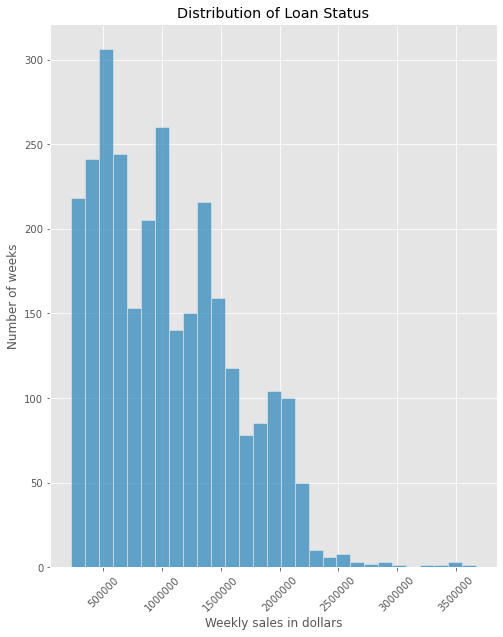

In [52]:
#explore our target
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['weekly_sales'],
                 #hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('Weekly sales in dollars')
plt.ylabel('Number of weeks')
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')

plt.show()

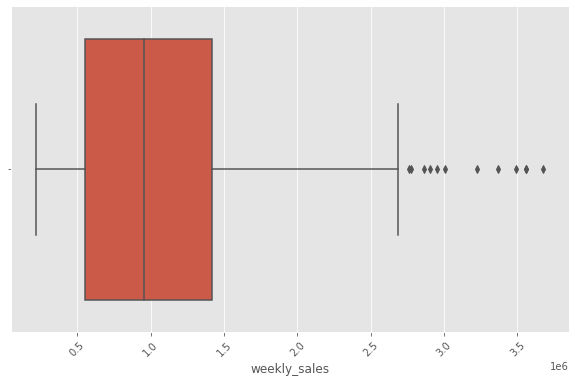

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xticks(rotation=45)
#plt.ticklabel_format(style = 'plain')
plt.show()

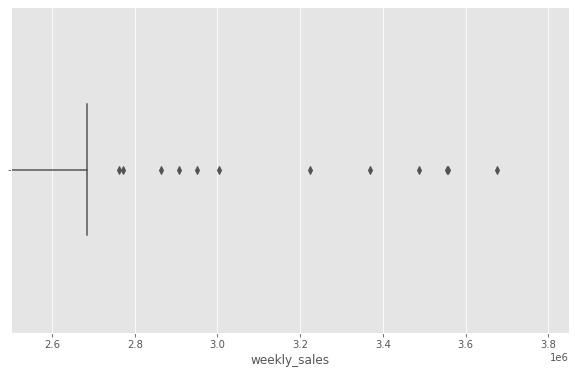

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xlim(2500000)
plt.show()

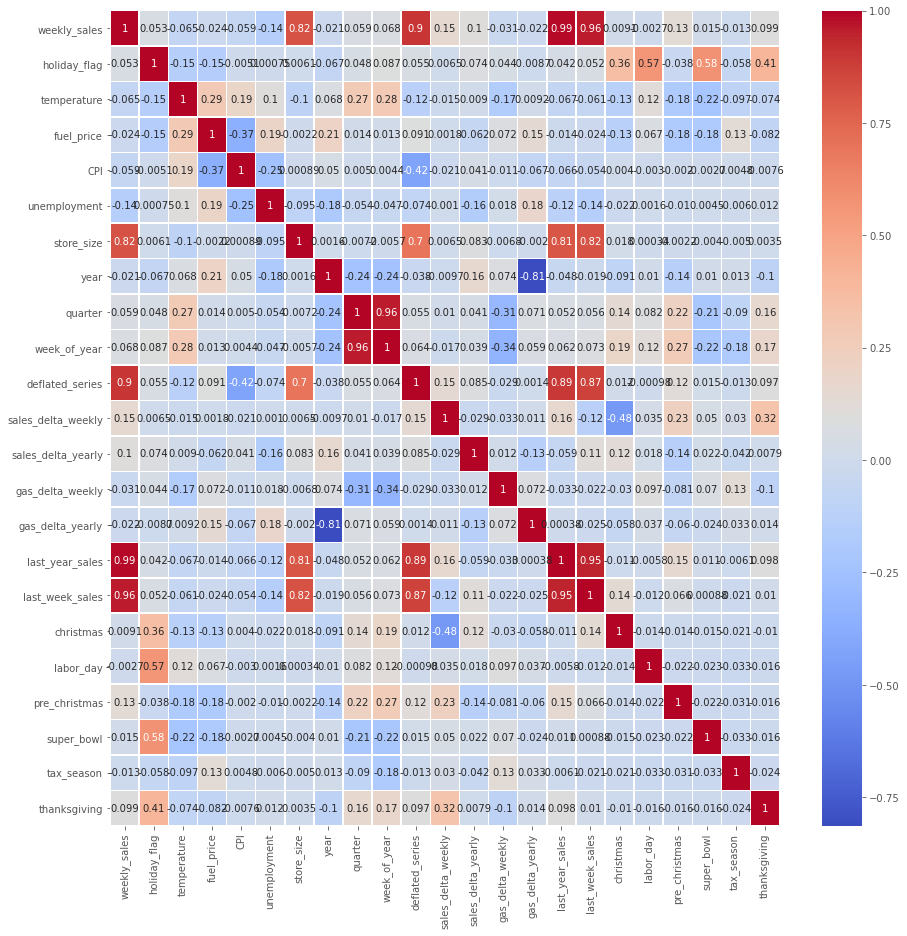

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

In [56]:
#check the relation of my target with all the featues

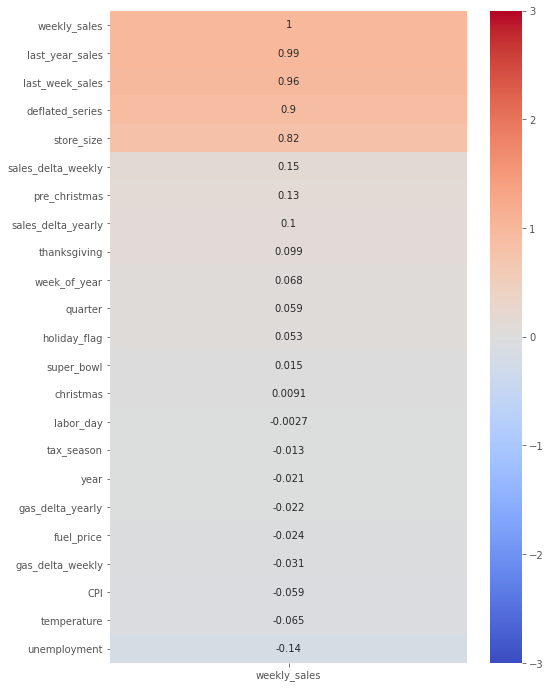

In [57]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['weekly_sales']].sort_values(by='weekly_sales', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

**takeaways**
- last week_sales, last_year_sales and store_size have stroger correlation with out target
- pre_christmas has also a positive correlation
- we can not use deflated_series because was calculated using our target
- negative correlation unemployment 

## Exploration target vs Fearture

### -  weekly_sales vs store_size

<Figure size 1152x720 with 0 Axes>

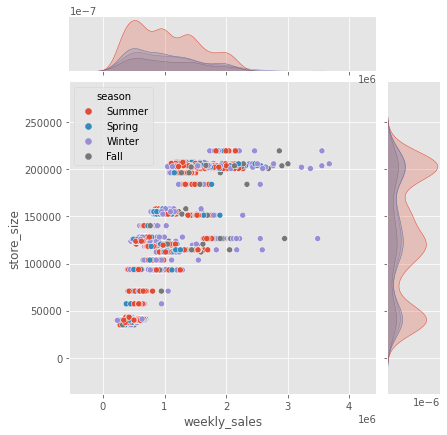

In [58]:
plt.figure(figsize=(16, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='season')

**takeaways**
- the small the store, less weekly sales
- winter has the greater weekly sales

### -  weekly_sales vs temperature

<Figure size 864x720 with 0 Axes>

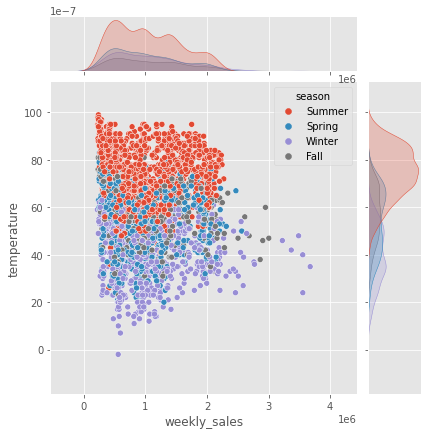

In [59]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train, hue= "season")
plt.show()

**Takeaways**
- Winter and fall have the greater weekly_sales. may it is because of christmas and blackfriday

In [60]:
# winter_df = train[train.season == "Winter"][['weekly_sales', 'temperature', 'season']]
# winter_df.head()

In [61]:
# sns.jointplot(x= 'weekly_sales', y= 'temperature', data = winter_df, hue= "season")

In [62]:
train.season.unique()

array(['Summer', 'Spring', 'Winter', 'Fall'], dtype=object)

In [63]:
color_list = ['blue','green', 'red', 'orange']

In [64]:
for season, color in zip(train.season.unique(), color_list):
    print(season, color)

Summer blue
Spring green
Winter red
Fall orange


Summer


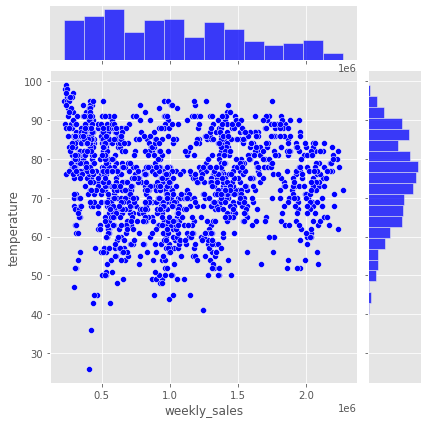

Spring


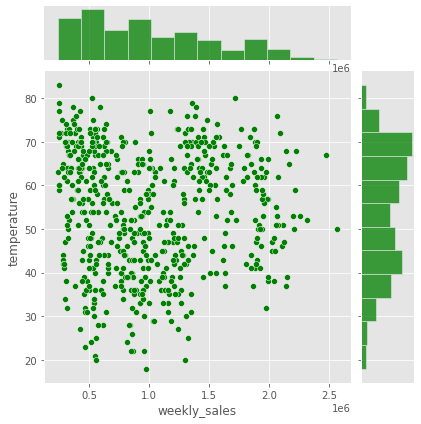

Winter


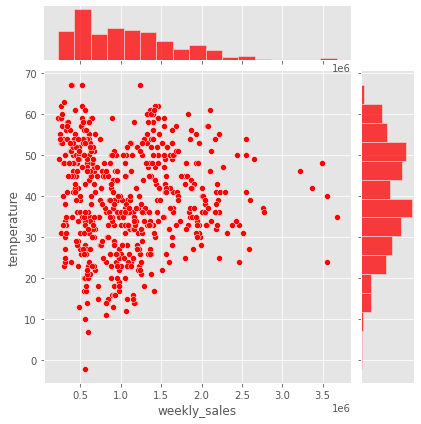

Fall


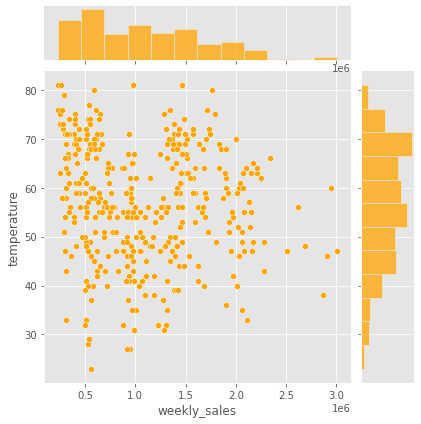

In [65]:

for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train[train.season==season], color= c)
    plt.show()

### -  weekly_sales vs holiday_name

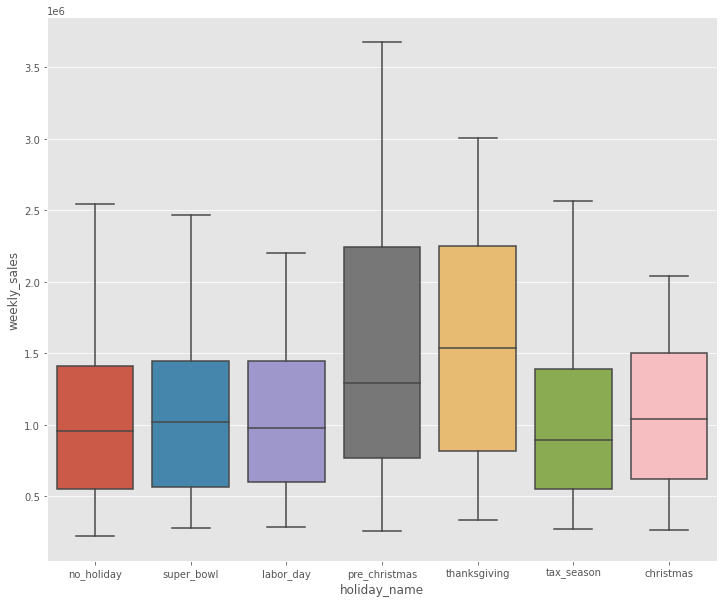

In [66]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['holiday_name'], y =train['weekly_sales'] )
plt.show()

**Takeaways**
- the 2 holidays with the greatest weekle_sales are pre_christmas and thanksgiving
-we can see christmas does not have large amount of weekly_sales it is because the people buy before christmas , it is not like blackfriday that the people actually buy in this specific week

### - weekly_sales vs season

<AxesSubplot:xlabel='season', ylabel='weekly_sales'>

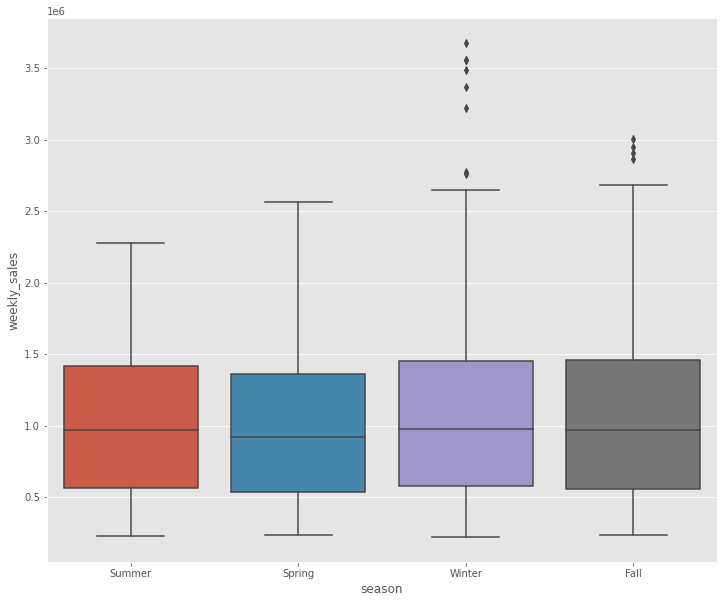

In [67]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['season'], y =train['weekly_sales'] )

**takeaways**
- we see some outliers but basically there are the weekly sales for thanksgiving and christmas (pre)
- we can say summer has the lowest range of weekly sales amout

Summer


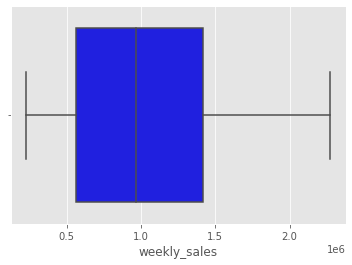

Spring


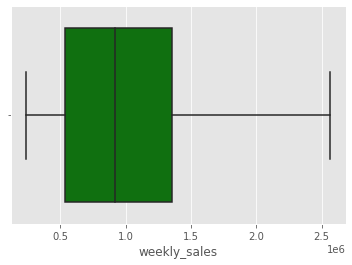

Winter


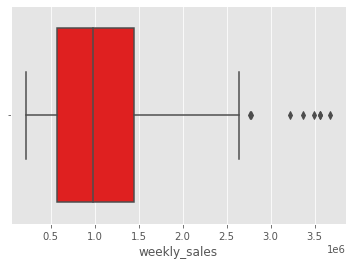

Fall


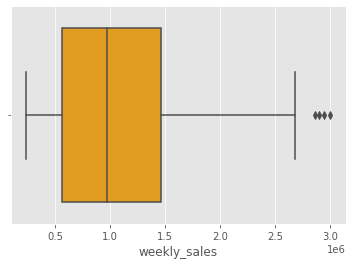

In [68]:
for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.boxplot(x= train[train.season== season]['weekly_sales'], color = c )
    plt.show()

**takeaways**
- it looks like summer has the lowest median 

# model

In [69]:
#imports
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor 
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import PolynomialFeatures

In [70]:

# #conver y_train y _ validate to df
y_train_df = pd.DataFrame( {'actual': y_train})
y_test_df = pd.DataFrame( {'actual': y_test})

In [71]:
def select_kbest  (X_df, y_df, n_features):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the SelectKBest class
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    Example
    select_kbest(X_train_scaled, y_train, 2)
    '''
    
    f_selector = SelectKBest(score_func=f_regression, k= n_features)
    f_selector.fit(X_df, y_df)
    mask = f_selector.get_support()
    X_df.columns[mask]
    top = list(X_df.columns[mask])
    print(f'The top {n_features} selected feautures based on the SelectKBest class are: {top}' )
    return top

In [93]:
def select_rfe (X_df, y_df, n_features, method):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the Recursive Feature Elimination (RFE)
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    method : LinearRegression, LassoLars, TweedieRegressor
    Example
    select_rfe(X_train_scaled, y_train, 2, LinearRegression())
    '''
    lm = method
    rfe = RFE(estimator=lm, n_features_to_select= n_features)
    rfe.fit(X_df, y_df)
    top_rfe = list(X_df.columns[rfe.support_])
    print(f'The top {n_features} selected feautures based on the the RFE class class are: {top_rfe}' )
    print(pd.Series(dict(zip(X_df.columns, rfe.ranking_))).sort_values())
    return top_rfe


In [114]:
def regression_errors(df, y, yhat):
    '''
    Takes in a dataframe , y = column with actual_values and yhat= name of the columns with predicted_values
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values.
    Example:
    plot_residuals(df, 'tip', 'yhat')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt
    
    
    #calculate SSE using sklearn
    SSE = mean_squared_error(df[y], df[yhat])*len(df)
    #explained sum of squares (ESS)
    ESS = ((df[yhat] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE = mean_squared_error(df[y], df[yhat])
    #root mean squared error (RMSE)
    RMSE = sqrt(MSE)
    
    #create a dictionary
    m= {
        'sse': SSE,
        'ess': ESS,
        'rmse': RMSE,
        'tss': TSS,
        'mse': MSE,
        'r2': ESS/TSS,
    }

    return m

In [116]:
def create_model (X_df_scaled, y_df, actual, method, name):
    '''
    takes in features scaled df, target df, name of actual target, 
    type of method and the name of the selected method and 
    returns a dictionary that contains calculated regression errors.
    
    X_df_scaled : df that contains scaled featues
    y_df: target df
    actual: name of the column where is actual value of the target
    mehod: type of method to create the model object
    name: enter the new name for your model
    
    Example:
    create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
    '''
    # fit the thing
    method.fit(X_df_scaled, y_df[actual])

    # predict train
    y_df[name] = method.predict(X_df_scaled)

    #calculate regression errors using a created function
    train_eval = regression_errors(y_df, actual, name)

    return train_eval

In [117]:
def report(metric_df):
    
    from IPython.display import display, HTML
    rmse_base = metric_df.iloc[0,2]
    print(f'These are the models that perform better than our baseline rmse: {rmse_base}')
    dfs =metric_df[['model', 'rmse_validate']][metric_df['rmse_validate'] < rmse_base]
    display(HTML(dfs.to_html()))
    
    
    min_val = metric_df['rmse_validate'].idxmin()
    metric_df.iloc[min_val][0]
    rsme_bet = round(metric_df['rmse_validate'].iloc[min_val], 2)
    print('-----------------------------------------------------------------------------------------------')
    print(f'   ********** The model with the less  rmse_validate  is {metric_df.iloc[min_val][0] }  rmse:{rsme_bet} **********             ')
    print('-----------------------------------------------------------------------------------------------')
    print(' ')
    min_val = metric_df['r^2_validate'].idxmax()
    metric_df.iloc[min_val][0]
    print(f'The model with r^2 validate closer to 1 is ', metric_df.iloc[min_val][0])
    
    display(HTML(metric_df.to_html()))
    return

In [118]:
def baseline_errors(df, y, option ):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values
    Example:
    baseline_mean_errors(y_train, 'actual')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    if option == 'mean':
        df['yhat_baseline_mean'] = df[y].mean()
        col = 'yhat_baseline_mean'
    elif option == 'median':
        df['yhat_baseline_median'] = df[y].median()
        col = 'yhat_baseline_median'
    else:
        return print("please select the correct option: 'mean' or 'median' ")
        
    

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df[col])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df[col] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df[col])
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

**- Baseline**

In [76]:
y_train.mean()

1044296.2597557559

In [77]:
y_train.median()

957922.2949999999

In [78]:
#create baseline using mean (I'm using my function to calculate rmse)
tra = baseline_errors(y_train_df, 'actual', 'mean')
tra['rmse']

563052.7256939057

In [190]:
#create a df to store metrics
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : round(tra['rmse'], 2),
    'r^2' : 0}])

In [191]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,563052.73,0


### - select k best

In [81]:
#dropping the columns that are related with our target
X_train_scaled = X_train_scaled.drop(columns = ['deflated_series','sales_delta_weekly','sales_delta_yearly'])

In [85]:
#using my function for SelectkBest
top_sb =select_kbest(X_train_scaled, y_train, 6)

The top 6 selected feautures based on the SelectKBest class are: ['unemployment', 'store_size', 'last_year_sales', 'last_week_sales', 'pre_christmas', 'thanksgiving']


##  LinearRegression (OLS)

### - RFE

In [196]:
top_rfe = select_rfe(X_train_scaled, y_train, 8,LinearRegression(normalize=True, fit_intercept=True ))

The top 8 selected feautures based on the the RFE class class are: ['holiday_flag', 'unemployment', 'last_year_sales', 'last_week_sales', 'christmas', 'labor_day', 'super_bowl', 'thanksgiving']
holiday_flag         1
super_bowl           1
labor_day            1
christmas            1
last_week_sales      1
last_year_sales      1
thanksgiving         1
unemployment         1
week_of_year         2
quarter              3
pre_christmas        4
store_size           5
fuel_price           6
year                 7
gas_delta_yearly     8
temperature          9
CPI                 10
gas_delta_weekly    11
tax_season          12
dtype: int64


### - cross validation

In [197]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [198]:
#create the model
clf = LinearRegression(normalize=True)
#cv = number of folds
cross_val_score(clf, X_train_scaled, y_train, cv=5).mean()

0.9826501779236793

In [199]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [200]:
#create the model
clf = LinearRegression(normalize=True)
#cv = number of folds
cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring = 'r2').mean()

0.9826501779236793

In [201]:
#create the model
clf = LinearRegression(normalize=True)
#cv = number of folds
cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring = 'neg_root_mean_squared_error').mean()

-73910.79537108631

In [202]:
#create the model
clf = LinearRegression(normalize=False)
#cv = number of folds
cross_val_score(clf, X_train_scaled, y_train, cv=3).mean()

0.9825943012738833

## GridSearchCV

In [214]:
def gridsearch ( model, params, score):
    '''
    '''
    grid = GridSearchCV(ols, params, cv=5, scoring= score )
    grid.fit(X_train_scaled, y_train)
    #see the cross validation results in the cv_results_ property of the object we created.
    results = grid.cv_results_
    # I will use mean_test_score
    test_scores = results['mean_test_score']
    #GETTING THE PARAMETERS
    params = results['params']
    #We can combine these features together into a data frame to see how our different models perform:
    for p, s in zip(params, test_scores):
        p['score'] = s

    return pd.DataFrame(params).sort_values(by='score')

In [203]:
from sklearn.model_selection import GridSearchCV

#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {'normalize': [ True, False],
          'fit_intercept': [True, False]}

ols = LinearRegression()

grid = GridSearchCV(ols, params, cv=5, scoring='neg_root_mean_squared_error')

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_root_mean_squared_error')

In [204]:
#see the cross validation results in the cv_results_ property of the object we created.
results = grid.cv_results_
results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_fit_intercept', 'param_normalize', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [205]:
# I will use mean_test_score
test_scores = results['mean_test_score']
test_scores

array([-73910.79537109, -73902.8390497 , -77238.39566647, -77238.39566647])

In [206]:
params = results['params']
params

[{'fit_intercept': True, 'normalize': True},
 {'fit_intercept': True, 'normalize': False},
 {'fit_intercept': False, 'normalize': True},
 {'fit_intercept': False, 'normalize': False}]

In [207]:
#We can combine these features together into a data frame to see how our different models perform:
for p, s in zip(params, test_scores):
    p['score'] = s

pd.DataFrame(params).sort_values(by='score')

,fit_intercept,normalize,score
2,False,True,-77238.395666
3,False,False,-77238.395666
0,True,True,-73910.795371
1,True,False,-73902.839050


In [216]:
#specify the parameters we wish to use as a dictionary, then use that dictionary when we create the class.
params = {'normalize': [ True, False],
          'fit_intercept': [True, False]}

In [217]:
gridsearch ( LinearRegression() , params, 'neg_root_mean_squared_error')

,fit_intercept,normalize,score
2,False,True,-77238.395666
3,False,False,-77238.395666
0,True,True,-73910.795371
1,True,False,-73902.839050


In [218]:
gridsearch ( LinearRegression() , params, 'r2')

,fit_intercept,normalize,score
2,False,True,0.981057
3,False,False,0.981057
0,True,True,0.982650
1,True,False,0.982654


In [208]:
### OLS uising  select K best (6)

In [209]:
ols_rfe = create_model(X_train_scaled[top_sb], y_train_df, 'actual', LinearRegression(normalize=True, fit_intercept=True ), 'modelOLS' )
ols_rfe['rmse']


75736.89572808747

In [210]:
### OLS uising  RFE (8)

In [211]:
ols_rfe = create_model(X_train_scaled[top_rfe], y_train_df, 'actual', LinearRegression(normalize=True, fit_intercept=True ), 'modelOLS' )
ols_rfe['rmse']

74557.20308979187

In [212]:
metric_df = metric_df.append(
    {
    'model': 'ols_rfe',
    'rmse_train': ols_rfe['rmse'],    
    'r^2' : ols_rfe['r2']}, ignore_index=True)

In [213]:
metric_df

,model,rmse_train,r^2
0,mean_baseline,563052.73000,0.000000
1,ols_rfe,74557.20309,0.982213
2,ols_rfe,74557.20309,0.982213


## LassoLars

In [ ]:
### RFE
